## Model Optimization

* After running the same hyperparamter tuner model (all inputs and setting the same), our initial EDA idetified that utilizing a dataset with replaced cholesterol values would lead to the highest possible accuracy. We then decided to utilize that dataset and try to optimize using keras sequential modeling. This allowed us to have more control over the architecture of each attempt and manually change the number of layers, neurons, activation functions and epochs.

In [1]:
# Import dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# Creating initial machine learning model as baseline
# Importing dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf


In [2]:
# Create a path reference to the file 
heart_path_replaced = Path("resources/heart_replaced_values.csv")



# Read CSV into DataFrame
df_replaced = pd.read_csv(heart_path_replaced, delimiter=",")

In [3]:
# Split our preprocessed data into our features and target arrays
y = df_replaced['HeartDisease']
X = df_replaced.drop(columns='HeartDisease')

In [4]:
# Convert categorical data to numeric with `pd.get_dummies`
X= pd.get_dummies(X)
# Drop the non-beneficial ID columns, 'HeartDisease'.

X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,False,True,False,True,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,True,False,False,False,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,False,True,False,True,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,True,False,True,False,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,False,True,False,False,True,False,False,True,False,True,False,False,False,True


In [5]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .2)

In [6]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
X_train.shape

(734, 20)

## Attempt 4 - 85.33% accuracy, 40.11% loss

### Base Sequential Model

In [8]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1


nn_model_4 = tf.keras.models.Sequential()

# First hidden layer
nn_model_4.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

nn_model_4.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_4.summary()

/Users/ericprice/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compile the model
nn_model_4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Train the model
model_4 = nn_model_4.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.4473 - loss: 0.7085 
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5514 - loss: 0.6698
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - accuracy: 0.6955 - loss: 0.6385
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.8128 - loss: 0.5903
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8173 - loss: 0.5611
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8294 - loss: 0.5375
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8560 - loss: 0.4943
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8892 - loss: 0.4645
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8705 - loss: 0.4610
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8619 - loss: 0.4570
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.8648 - loss: 0.4522
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/ste

In [11]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 10ms/step - accuracy: 0.8533 - loss: 0.4011
Loss: 0.4011082053184509, Accuracy: 0.85326087474823


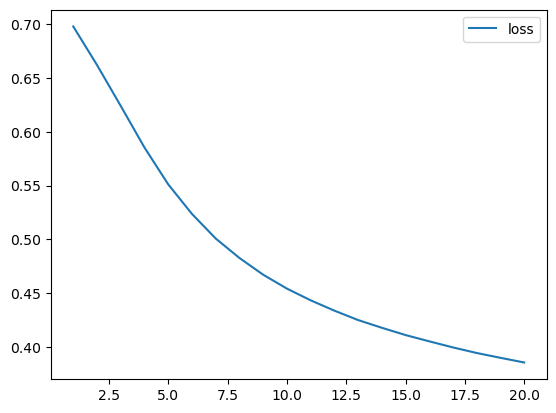

In [12]:
# Create a DataFrame containing training history
a4_df = pd.DataFrame(model_4.history)

# Increase the index by 1 to match the number of epochs
a4_df.index += 1

# Plot the loss
a4_df.plot(y="loss")
plt.show()

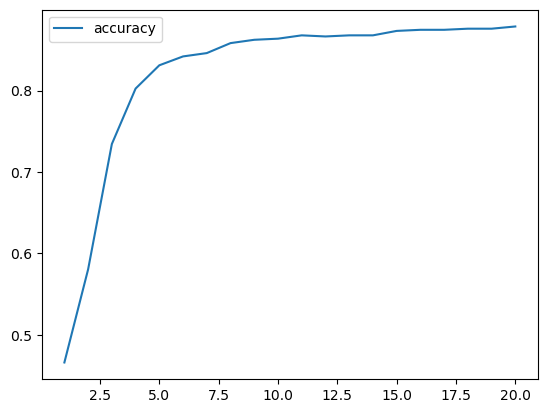

In [13]:
# Plot the accuracy
a4_df.plot(y="accuracy")
plt.show()

## Attempt 5 - 84.24% accuracy, 43% loss


### Changing number of layers

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1


nn_model_5 = tf.keras.models.Sequential()

# First hidden layer
nn_model_5.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn_model_5.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))


# Output layer
nn_model_5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_5.summary()

/Users/ericprice/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159 (636.00 B)

 Trainable params: 159 (636.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compile the model
nn_model_5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
# Train the model
model_5 = nn_model_5.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.7672 - loss: 0.5876
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - accuracy: 0.8183 - loss: 0.5529
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.8435 - loss: 0.5273
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.8132 - loss: 0.5303
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 342us/step - accuracy: 0.8432 - loss: 0.4965
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.8336 - loss: 0.5003
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.8670 - loss: 0.4751
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.8602 - loss: 0.4707
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - accuracy: 0.8570 - loss: 0.4714
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - accuracy: 0.8637 - loss: 0.4562
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.8665 - loss: 0.4504
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 9ms/step - accuracy: 0.8424 - loss: 0.4300
Loss: 0.42996710538864136, Accuracy: 0.842391312122345


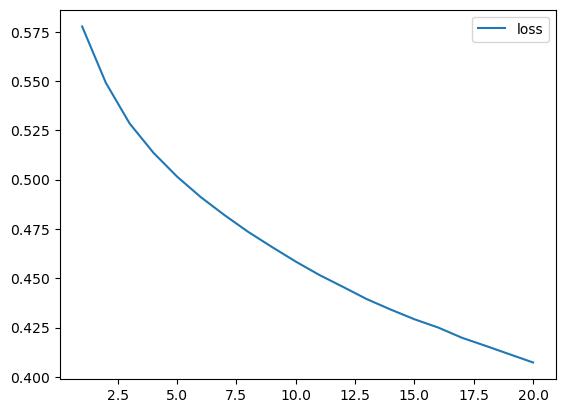

In [19]:
# Create a DataFrame containing training history
a5_df = pd.DataFrame(model_5.history)

# Increase the index by 1 to match the number of epochs
a5_df.index += 1

# Plot the loss
a5_df.plot(y="loss")
plt.show()

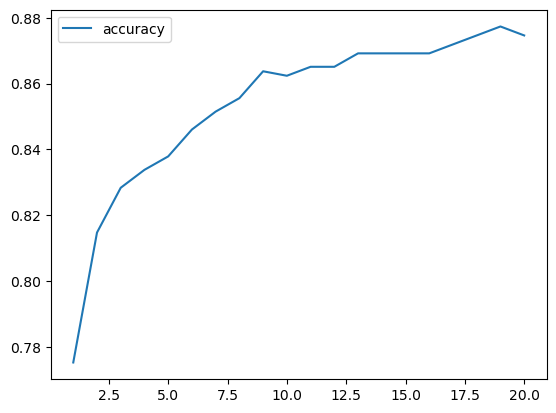

In [20]:
# Plot the accuracy
a5_df.plot(y="accuracy")
plt.show()

## Attempt #6 - 86.96% accuracy, 39.52% loss

### Changing number of epochs, 20 to 80

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1


nn_model_6 = tf.keras.models.Sequential()

# First hidden layer
nn_model_6.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer

nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

nn_model_6.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_6.summary()

/Users/ericprice/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
nn_model_6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Train the model
model_6 = nn_model_6.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.5350 - loss: 0.6915 
Epoch 2/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.6473 - loss: 0.6844
Epoch 3/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6218 - loss: 0.6821
Epoch 4/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.6940 - loss: 0.6738
Epoch 5/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.7310 - loss: 0.6640
Epoch 6/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.7434 - loss: 0.6550
Epoch 7/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.7939 - loss: 0.6430
Epoch 8/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.7947 - loss: 0.6340
Epoch 9/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.7809 - loss: 0.6269
Epoch 10/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.8027 - loss: 0.6157
Epoch 11/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.8432 - loss: 0.5962
Epoch 12/80
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step 

In [24]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_6.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 10ms/step - accuracy: 0.8696 - loss: 0.3952
Loss: 0.3952380120754242, Accuracy: 0.8695651888847351


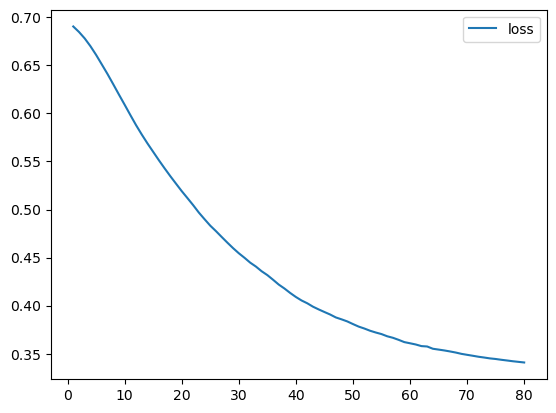

In [25]:
# Create a DataFrame containing training history
a6_df = pd.DataFrame(model_6.history)

# Increase the index by 1 to match the number of epochs
a6_df.index += 1

# Plot the loss
a6_df.plot(y="loss")
plt.show()

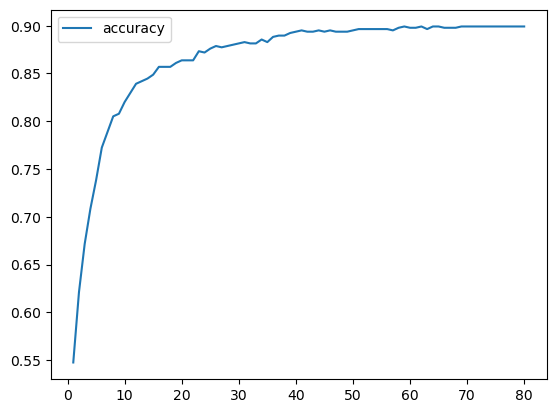

In [26]:
# Plot the accuracy
a6_df.plot(y="accuracy")
plt.show()

## Attempt #7 - 83.15% accuracy, 46.15% loss

### changing activation functions
* 1st hidden layer - tanh
* 2nd hidden layer - tanh
* 3rd hidden layer - relu
* 4th hidden layer - sigmoid
* 5th hidden layer - tanh
* 6th hidden layer - tanh
* output layer - sigmoid

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 20
hidden_nodes_layer1 =  5
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 1
hidden_nodes_layer4 = 1
hidden_nodes_layer5 = 1
hidden_nodes_layer6 = 1


nn_model_7 = tf.keras.models.Sequential()

# First hidden layer
nn_model_7.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Fifth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Sixth hidden layer
nn_model_7.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="tanh"))

# Output layer
nn_model_7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_model_7.summary()

/Users/ericprice/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 5)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 7)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163 (652.00 B)

 Trainable params: 163 (652.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
nn_model_7.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
# Train the model
model_7 = nn_model_7.fit(X_train_scaled, y_train, epochs=20)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 517us/step - accuracy: 0.5421 - loss: 0.6903 
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step - accuracy: 0.5575 - loss: 0.6630
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.5356 - loss: 0.6573
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.6841 - loss: 0.6361
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.7754 - loss: 0.6147
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8301 - loss: 0.5992
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8086 - loss: 0.5930
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - accuracy: 0.8333 - loss: 0.5797
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.8492 - loss: 0.5608
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8735 - loss: 0.5424
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8615 - loss: 0.5399
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/ste

In [36]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model_7.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

6/6 - 0s - 9ms/step - accuracy: 0.8315 - loss: 0.4615
Loss: 0.46146103739738464, Accuracy: 0.83152174949646


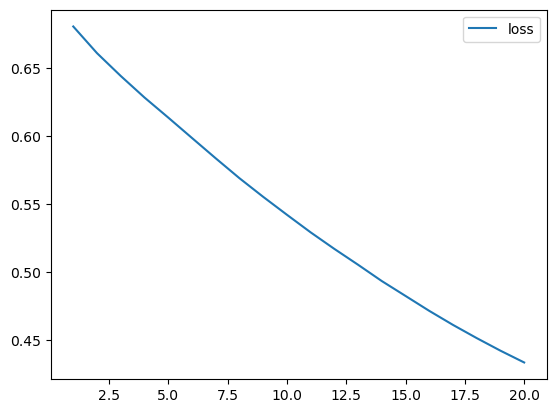

In [37]:
# Create a DataFrame containing training history
a7_df = pd.DataFrame(model_7.history)

# Increase the index by 1 to match the number of epochs
a7_df.index += 1

# Plot the loss
a7_df.plot(y="loss")
plt.show()

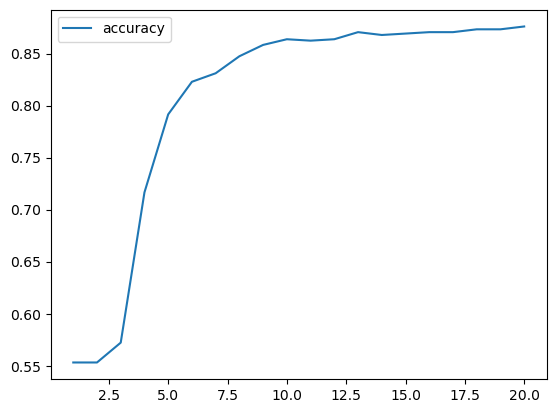

In [38]:
# Plot the accuracy
a7_df.plot(y="accuracy")
plt.show()

In [ ]:
y_test

In [ ]:
y_test.shape

In [39]:
# Calculate the classification report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
predictions = nn_model_6.predict(X_test_scaled, verbose = 0)
predictions = predictions.ravel()

In [40]:
# Define the array and the threshold
threshold = .7

# Transform numbers to 1 or 0 based on the threshold
transformed_predictions = [1 if x > threshold else 0 for x in predictions]

print(transformed_predictions)

[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0]


In [41]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, transformed_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, transformed_predictions)

In [42]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, transformed_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,68,14
Actual 1,11,91


Accuracy Score : 0.8641304347826086
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        82
           1       0.87      0.89      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



## Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train_scaled, y_train)

In [44]:
predictions = rf_model.predict(X_test_scaled)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [45]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,69,13
Actual 1,8,94


Accuracy Score : 0.8858695652173914
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        82
           1       0.88      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [46]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.14506994954200395, 'ST_Slope_Up'),
 (0.11066024752118885, 'ChestPainType_ASY'),
 (0.0916464786581693, 'Oldpeak'),
 (0.08930000400556767, 'ST_Slope_Flat'),
 (0.08558495744528438, 'MaxHR'),
 (0.07757751074015712, 'Age'),
 (0.07372262912490989, 'Cholesterol'),
 (0.07230874197233211, 'RestingBP'),
 (0.05086004724046693, 'ExerciseAngina_N'),
 (0.050550798290586105, 'ExerciseAngina_Y')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

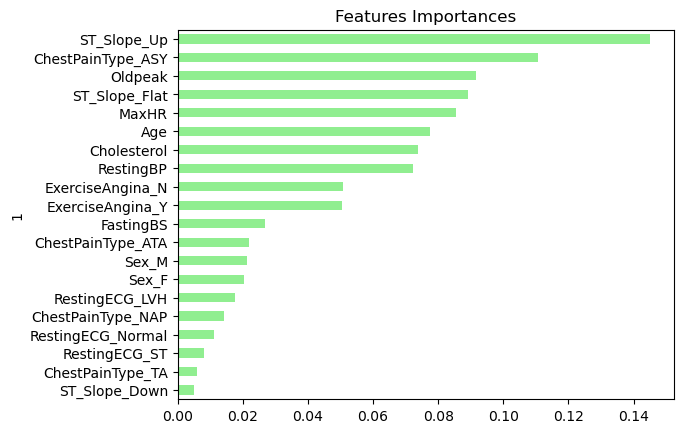

In [47]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

## Logisitic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(solver="lbfgs").fit(X_train_scaled, y_train)
predictions = log_classifier.predict(X_test_scaled)                                                                  

In [50]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [51]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,67,15
Actual 1,13,89


Accuracy Score : 0.8478260869565217
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        82
           1       0.86      0.87      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184

